[[5.0, 2.0, 4.0], [2.0, 8.0, 7.0], [4.0, 7.0, 5.0]]
isValid: True
D 36.0
Elliptic


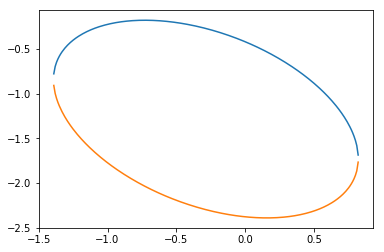

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

class Curve2:
    def __init__(self, A,B,C,D,E,F):
        # Ax^2+By^2+2Cxy+2Dx+2Ey+F
        two = float(2)
        self.a = [[float(A),C/two,D/two],[C/two,float(B),E/two],[D/two,E/two,float(F)]]
        
    def isValid(self):
        
        return not math.pow(self.a[1][1],2)+math.pow(self.a[1][2],2)+math.pow(self.a[2][2],2) == 0
    
    def det(self):
        a11 = self.a[0][0]
        a12 = self.a[0][1]
        a22 = self.a[1][1]
        matrix =np.array([ 
            [ a11, a12 ],
            [ a12, a22 ]
        ])
        return np.linalg.det(matrix)
    def getType(self):
        D = self.det
        if D == 0:
            return "Parabolic"
        else:
            if D > 0:
                return "Elliptic"
        return "Giperbolic"
    def getY(self,x):
        A = self.a[0][0]  # a11
        B = 2*(self.a[1][0]*x+self.a[1][2])
        C = A*pow(x,2)+2*self.a[0][2]*x+self.a[2][2]
        return sqEquation(A,B,C)
        
    def toPlot(self,interval):
        x = []
        y = []
        for i in interval:
            tmp = self.getY(i)
            if not tmp == False:
                y.append(tmp)
                x.append(i)
        return [x,y]
    
def sqEquation(A,B,C):
    D = B*B - 4*A*C
    #print D
    if D == 0:
        return -B/(2*A)
    if D >= 0:
        z = math.sqrt(D)
        #print z
        y1 = (-1*B + z)/(2*A)
        y2 = (-1*B - z)/(2*A)
        return [y1,y2]
    return False

ellips = Curve2(5,8,4,8,14,5)
print ellips.a
print "isValid: "+str(ellips.isValid())
print "D "+str(ellips.det())
print ellips.getType()
coords = ellips.toPlot(np.arange(-15.0, 15.0, 0.01))
#print coords
plt.plot(coords[0], coords[1])
plt.show()
